<a href="https://colab.research.google.com/github/BenMeehan/Exploratory-Data-Analysis/blob/main/Dimensionality_Reduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **IDEA**
**Reduce dimension of n-d data to visualize it.**

# **Data Pre-Processing**
**1. Feature Normalization**

Take all n of feature a and make them lie between 0,1

ai`=(a,i-a,min)/(a,max-a,min)

*why? 
It removes scale such as kg, cm etc...*

**2. Compute mean vector**

mean vector =[mean(feature1),mean(feature2)...]

**3.Column Standardisation or Mean Centering**(more common than column normalization)

Find the mean and std deviation of population of feature and compute 
ai`=(ai-mean)/std dev

this makes that the mean of ai` is 0 and standard deviation is 1.

**4. Covariance Matrix**

A dxd matrix having covariance of all ith and jth columns.
The diagonal elements represnt variance of ith feature.

if Matrix is column standardised then ,

Covariance matrix S=(X`X)/n

# **MNIST Dataset**

https://www.kaggle.com/c/digit-recognizer/data?select=train.csv

In [95]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [96]:
df=pd.read_csv("./train.csv")
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [97]:
label=df['label']

In [98]:
label

0        1
1        0
2        1
3        4
4        0
        ..
41995    0
41996    1
41997    7
41998    6
41999    9
Name: label, Length: 42000, dtype: int64

In [99]:
df=df.drop("label",axis=1)

9

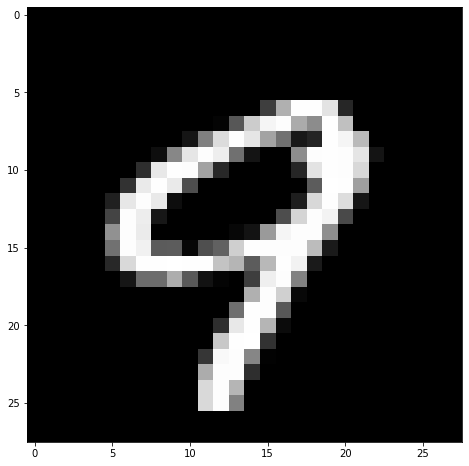

In [100]:
idx=100
data=df.iloc[idx].values.reshape((28,28))
plt.figure(figsize=(8,8))
plt.imshow(data,cmap="gray")
label[idx]

In [101]:
df.shape

(42000, 784)

In [131]:
l=label.iloc[0:20000]
X=df.head(20000)

In [132]:
from sklearn.preprocessing import StandardScaler
std_data = StandardScaler().fit_transform(X)

In [156]:
#Covariance matrix
S=(1/len(X))*np.matmul(std_data.T,std_data)

In [157]:
from scipy.linalg import eigh
v,vec=eigh(S)
vec.shape

(784, 784)

In [158]:
# getting the 2 largest eigen values and eigen vectors
v=v[782:784]
vec=vec[:,782:784]

In [159]:
vec=vec.T

In [162]:
# Change of basis
new_co=np.matmul(vec,std_data.T)

In [163]:
new_co.shape

(2, 20000)

In [178]:
# appending label to the 2d projected data
new_coordinates = np.vstack((new_co, l)).T

# creating a new data frame for ploting the labeled points.
dataframe = pd.DataFrame(data=new_coordinates, columns=("1st_principal", "2nd_principal", "label"))
print(dataframe.head())

   1st_principal  2nd_principal  label
0       5.430697       5.060862    1.0
1      -6.242999     -19.293148    0.0
2       1.828611       7.684498    1.0
3      -5.585495       0.440132    4.0
4      -6.333250     -26.597773    0.0


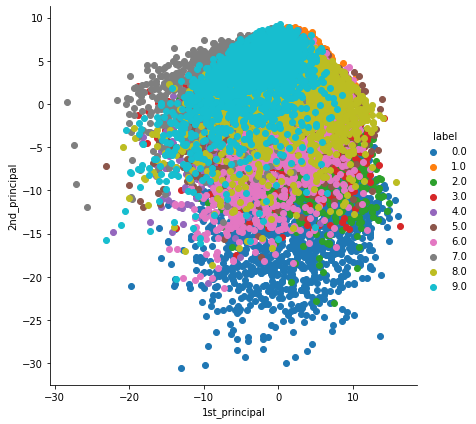

In [180]:
import seaborn as sn
sn.FacetGrid(dataframe, hue="label", height=6).map(plt.scatter, '1st_principal', '2nd_principal').add_legend()
plt.show()

In [182]:
# Simpler method
from sklearn import decomposition
pca = decomposition.PCA()

In [183]:
pca.n_components = 2
pca_data = pca.fit_transform(std_data)


In [184]:
pca_data

array([[-5.06086678, -5.43176367],
       [19.29314002,  6.24315659],
       [-7.68448667, -1.82770614],
       ...,
       [-0.08480473, -5.46954592],
       [ 2.96186667, 16.3076834 ],
       [-5.19076263, 10.74537935]])

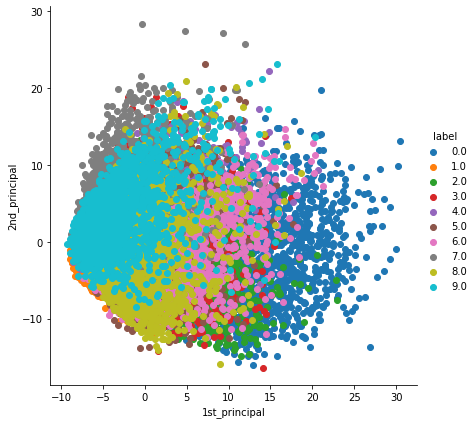

In [185]:
# attaching the label for each 2-d data point 
pca_data = np.vstack((pca_data.T, l)).T

# creating a new data fram which help us in ploting the result data
pca_df = pd.DataFrame(data=pca_data, columns=("1st_principal", "2nd_principal", "label"))
sn.FacetGrid(pca_df, hue="label", height=6).map(plt.scatter, '1st_principal', '2nd_principal').add_legend()
plt.show()